In [1]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/home/volodya/my_rep/course/data/real_estate.csv',  delimiter=',', low_memory=False)
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


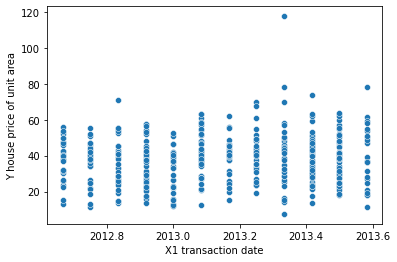

In [3]:
sns.scatterplot(data=data, x = 'X1 transaction date', y='Y house price of unit area')

plt.show()

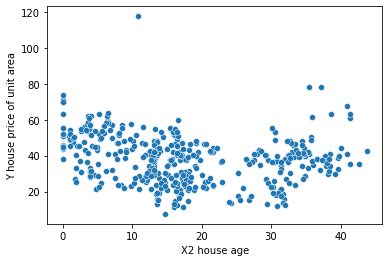

In [4]:
sns.scatterplot(data=data, x = 'X2 house age', y='Y house price of unit area')

plt.show()

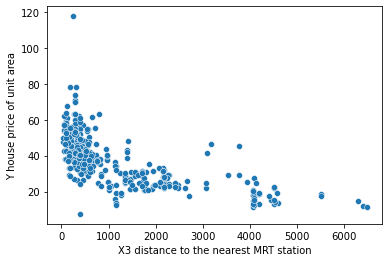

In [5]:
sns.scatterplot(data=data, x = 'X3 distance to the nearest MRT station', y='Y house price of unit area')

plt.show()

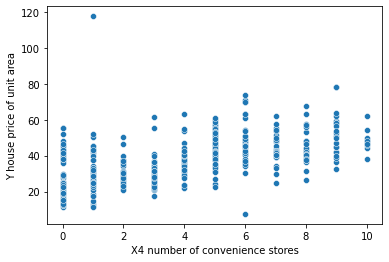

In [6]:
sns.scatterplot(data=data, x = 'X4 number of convenience stores', y='Y house price of unit area')

plt.show()

https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap

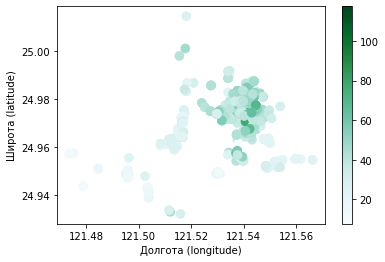

In [7]:
points = plt.scatter(x=data["X6 longitude"], y=data['X5 latitude'],
                c=data['Y house price of unit area'], s=75, cmap="BuGn")
plt.colorbar(points)
plt.xlabel('Долгота (longitude)')
plt.ylabel('Широта (latitude)')
plt.show()

In [8]:
# N24.98, E121.54

In [9]:
train, test = train_test_split(
    data, test_size = 0.33, random_state = 0
)

feature_names = [
    'X2 house age', 
    'X3 distance to the nearest MRT station', 
    'X4 number of convenience stores',
    "X5 latitude",
    "X6 longitude"]
target_name = 'Y house price of unit area'

X_train = train[feature_names]
y_train = train[target_name]
X_test = test[feature_names]
y_test = test[target_name]

# LinearRegression

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr_object = LinearRegression(fit_intercept=True)
lr_object.fit(X_train, y_train)

pd.DataFrame({'features': ['intercept'] + list(lr_object.feature_names_in_),
             'coeffitients': [lr_object.intercept_] + list(lr_object.coef_)})

,features,coeffitients
0,intercept,-5847.757871
1,X2 house age,-0.268672
2,X3 distance to the nearest MRT station,-0.004339
3,X4 number of convenience stores,1.063039
4,X5 latitude,264.953627
5,X6 longitude,-5.960477


Физический смысл коэффициентов:
- Коэффициент b1 показывает, насколько изменится цена дома при единичном изменении признака, если другие признаки будут оставаться неизменными.
- Intercept показывает, насколько значение цены дома, если все признаки будут равны 0.

In [12]:
y_train_pred = lr_object.predict(X_train)
y_test_pred = lr_object.predict(X_test)

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score

## MAE

$$MAE = \frac{1}{N}\sum_{i=1}^{N} \big| y_{true_i} - y_{pred_i} \big|$$

In [14]:
print(mean_absolute_error(y_true=y_train, y_pred=y_train_pred), ' - MAE on train')
print(mean_absolute_error(y_true=y_test, y_pred=y_test_pred), '- MAE on test')

6.301208069279683  - MAE on train
6.129943836015272 - MAE on test


## R2_score

$$R^2 = 1 - \frac{\sum_{i=1}^{N}  \big(y_{true_i} - y_{pred_i}\big)^2}{\sum_{i=1}^{N} \big(y_{true_i} - \overline{y}\big)^2}$$

Показывает, насколько модель работает лучше лучше предсказания среднего.

In [15]:
print(r2_score(y_true=y_train, y_pred=y_train_pred), ' - R2 on train')
print(r2_score(y_true=y_test, y_pred=y_test_pred), '- R2 on test')

0.5690544823480825  - R2 on train
0.5693434314017445 - R2 on test


Можно показать, что значение этой величины без квадрата $R$ — представляет собой коэффициент корреляции между предсказанными и реальными значениями.

In [16]:
from scipy.stats import pearsonr
print(pearsonr(y_train, y_train_pred)[0]**2, '- квадрат коэффициента корреляции на трейне')
print(pearsonr(y_test, y_test_pred)[0]**2, '- квадрат коэффициента корреляции на тесте')

0.5690544823480829 - квадрат коэффициента корреляции на трейне
0.5786130588481093 - квадрат коэффициента корреляции на тесте


## Случайный регрессор

In [17]:
y_train_stupid_predict = [y_train.mean() for i in range(0, len(y_train))]
y_test_stupid_predict = [y_train.mean() for i in range(0, len(y_test))]

In [18]:
print(mean_absolute_error(y_true=y_train, y_pred=y_train_stupid_predict), ' - MAE on train (Stupid)')
print(mean_absolute_error(y_true=y_test, y_pred=y_test_stupid_predict), '- MAE on test (Stupid)')

print(r2_score(y_true=y_train, y_pred=y_train_stupid_predict), ' - R2 on train (Stupid)')
print(r2_score(y_true=y_test, y_pred=y_test_stupid_predict), '- R2 on test (Stupid)')

10.91883121114572  - MAE on train (Stupid)
10.267843684945584 - MAE on test (Stupid)
0.0  - R2 on train (Stupid)
-0.0054727602172017775 - R2 on test (Stupid)


# RidgeRegression and Lasso Regression

https://www.desmos.com/calculator/fyyjrp2iol?lang=ru

**Ridge-регрессия**
$$\sqrt{Xw - y} + \alpha \cdot \sqrt{w_{1}^2 + w_{2}^2 + ...} \rightarrow min$$

$\alpha$ - коэффициент силы регуляризации. Чем больше $\alpha$, тем сильнее регурялизация. 

Часто вместо $\alpha$ используют его обратную величину $С = 1 / \alpha$. Чем меньше $C$, тем сильнее регуляризация.

**Lasso-регрессия**
$$\sqrt{Xw - y} + \alpha \cdot (|w_{1}| + |w_{2}| + ...) \rightarrow min$$

Когда $\alpha = 0$, оба вида регрессии превращаются в обычную логистическую регрессию.

In [19]:
from sklearn.linear_model import Ridge, Lasso

In [20]:
ridge_regression_object = Ridge(fit_intercept=True, alpha = 1)
ridge_regression_object.fit(X_train, y_train)
pd.DataFrame({'features': ['intercept'] + list(ridge_regression_object.feature_names_in_),
             'coeffitients': [ridge_regression_object.intercept_] + list(ridge_regression_object.coef_)})

,features,coeffitients
0,intercept,-66.946599
1,X2 house age,-0.252977
2,X3 distance to the nearest MRT station,-0.005615
3,X4 number of convenience stores,1.177553
4,X5 latitude,7.713391
5,X6 longitude,-0.670249


In [21]:
lasso_regression_object = Lasso(fit_intercept=True, alpha = 1)
lasso_regression_object.fit(X_train, y_train)

pd.DataFrame({'features': ['intercept'] + list(lasso_regression_object.feature_names_in_),
             'coeffitients': [lasso_regression_object.intercept_] + list(lasso_regression_object.coef_)})

,features,coeffitients
0,intercept,45.134489
1,X2 house age,-0.243737
2,X3 distance to the nearest MRT station,-0.005923
3,X4 number of convenience stores,0.985498
4,X5 latitude,0.000000
5,X6 longitude,-0.000000
